# Multiple Linear Regression Analysis

In this notebook we are using the preprocessed 'Greece - Agriculture and Rural Development' dataset to perform a Multiple Linear Regression analysis.

## Import packages and classes
Starting with Scikit-learn or simply sklearn, we will use the **LinearRegression()** function to fit a linear regression model.  We start by including the required libraries and classes:

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

The $pandas$ and $numpy$ libraries will be used for loading and preprocessing the data. We use the $matplotlib$ library for creating plots to better visualize the results. From $sklearn$ we import the $linear\_model.LinearRegression$ for creating our model, the $model\_selection.train\_test\_split$ function for splitting the dataset into **Train** and **Test sets**.

## Load dataset
We continue by loading the *Greece - Agriculture and Rural Development* dataset as a pandas frame using the $read\_csv()$ function.
For pure presenting purpuses we set the maximum number of columns that can be printed to 10 and using the *head()* function, we can view the first 5 rows of the dataset:

In [46]:
data_raw = pd.read_csv('../../../Datasets/Greece - Agriculture and Rural Development/agriculture-and-rural-development_grc.csv')
pd.set_option('display.max_columns', 10)
data_raw.head()

,Year,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),...,Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,1960,NaN,NaN,NaN,NaN,...,3671291,44.064,NaN,NaN,NaN
1,1961,NaN,NaN,69.123351,89100.0,...,3657099,43.547,-0.387316,NaN,131960.0
2,1962,NaN,NaN,69.061288,89020.0,...,3604016,42.660,-1.462143,NaN,131960.0
3,1963,NaN,NaN,69.984484,90210.0,...,3542618,41.778,-1.718278,NaN,131960.0
4,1964,NaN,NaN,69.751746,89910.0,...,3480851,40.901,-1.758920,NaN,131960.0


During the analysis of the dataset we saw that the data contains a lot of $NaN$ values. If we try to fit data containing $NaN$ values to the *Scikit-learn* $LinearRegression()$ function, it will throw a *ValueError* with the message *'Input contains NaN, infinity or a value too large for dtype('float64')'*.

## Select variables & Drop NaN values


In [47]:
variable_x1 = "Crop production index (2014-2016 = 100)"
variable_x2 = "Fertilizer consumption (kilograms per hectare of arable land)"
variable_y = "Cereal production (metric tons)"

data = data_raw[[variable_x1, variable_x2, variable_y]].dropna().reset_index(drop=True)
print("Shape of dataset: ", data.shape)
data.head()

Shape of dataset:  (58, 3)


,Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Cereal production (metric tons)
0,62.570000,56.808876,2243876.0
1,50.700001,69.161718,2426843.0
2,57.430000,71.491986,2122537.0
3,57.150002,82.112629,2874641.0
4,61.770000,83.807422,2940922.0


To handle this, we extracted the variables we need for our analysis,*Crop production index (2014-2016 - 100)*, *Fertilizer consumption (kilograms per hectare of arable land)* and *Cereal production (metric tons)* and drop the rows that contain $NaN$ values using the $dropna()$ function. The $reset\_index(drop=True)$ is used to reset the index of the dataframe. The $drop$ parameter is set to $True$ so that the initial indexing is dropped and not included in the final dataframe as a new column. The remaining data consist of 58 samples that can be used for training and testing the model. 
Next, we split the remaining samples in train and test sets using the Scikit-learn's $train\_test\_split()$ function.

## Train-test split

In [48]:
X_train, X_test, y_train, y_test = \
train_test_split(data[[variable_x1, variable_x2]], data[variable_y], test_size=0.2, random_state=42)

The $test\_size$ parameter, sets the percentage of samples to use in the test split. We follow a 80-20 split, meaning we will use 80\% of samples for training and 20\% for testing the model, so we set the parameter to 0.2. The $random\_ state$ parameter, controls the shuffling applied to the data before the split step. 
We can now fit the data to the linear regression model using the $fit()$ function.

## Sklean Linear Regression

In [49]:
model = LinearRegression().fit(X_train, y_train)

In [50]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: -302754.05845782626
Slope: [40960.00468321  5869.58929994]


The reason we are reshaping the training data, is that the fit function expects a training vector with shape $(n\_samples, n\_features)$, but our vector's shape is (58,). By reshaping we set the number of columns to 1. After fitting the data to the regression model, we print the intercept and the slope of the model.
We can now use the test set, we extracted earlier, and the trained model to make a prediction using the $predict()$ function.

## Prediction

In [59]:
y_pred = model.predict(X_test)
y_pred

array([2593558.19373947, 2826775.08297937, 5039776.97468691,
       3824855.37178243, 4911366.04715089, 3982049.13575247,
       4925593.88229389, 5069774.37132166, 4144531.98119637,
       3506473.4463983 , 4153764.8273091 , 2520077.68098123])

## Evaluation

Let's start the evaluation with the $score()$ function that calculates the accuracy of the model. The score is based on the coefficient of determination, i.e. *R^2*. The reason we don't need the actual predictions is because the $score()$ function calculates the predictions internally.

In [55]:
model.score(X_test, y_test)

0.7678107286789355

We can also use the $r2\_score()$, which does the same thing but needs the actual predicitons

In [56]:
print("R-Square value:", metrics.r2_score(y_test, y_pred))

R-Square value: 0.7678107286789355


We continue by calculating some more metrics like the **Mean Absolute Error, the Mean Square Error** and the **Room Mean Square Error**.

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 371321.56185082573
Mean Squared Error: 230281453819.20114
Root Mean Squared Error: 479876.4985068566


C:\Users\Andre\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


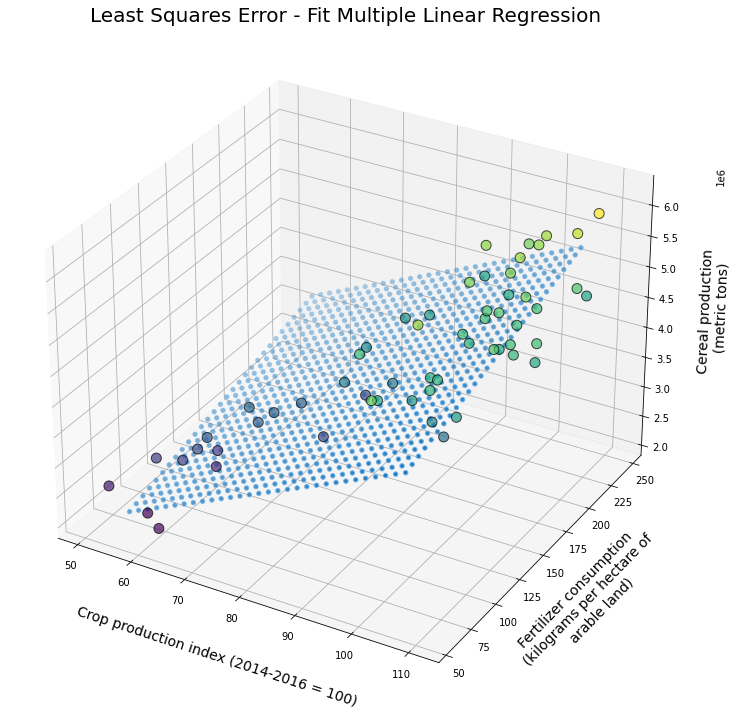

In [11]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[variable_x1], data[variable_x2], data[variable_y],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 100,
           c=data[variable_y])
plt.tight_layout()
xx_pred = np.linspace(np.min(X_test[variable_x1]), np.max(X_test[variable_x1]), 30)
yy_pred = np.linspace(np.min(X_test[variable_x2]), np.max(X_test[variable_x2]), 30)
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
predicted = model.predict(model_viz)

ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=20, edgecolor='#70b3f0')
ax.set_xlabel('Crop production index (2014-2016 = 100)', fontsize=14, labelpad=20)
ax.set_ylabel('Fertilizer consumption \n (kilograms per hectare of \n arable land)', fontsize=14, labelpad=20)
ax.set_zlabel('Cereal production \n (metric tons)', fontsize=14, labelpad=20)
plt.subplots_adjust(bottom=0.15)
plt.title("Least Squares Error - Fit Multiple Linear Regression", fontsize=20)
plt.tight_layout()
plt.savefig('../plots/LSE_fit.png')


C:\Users\Andre\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


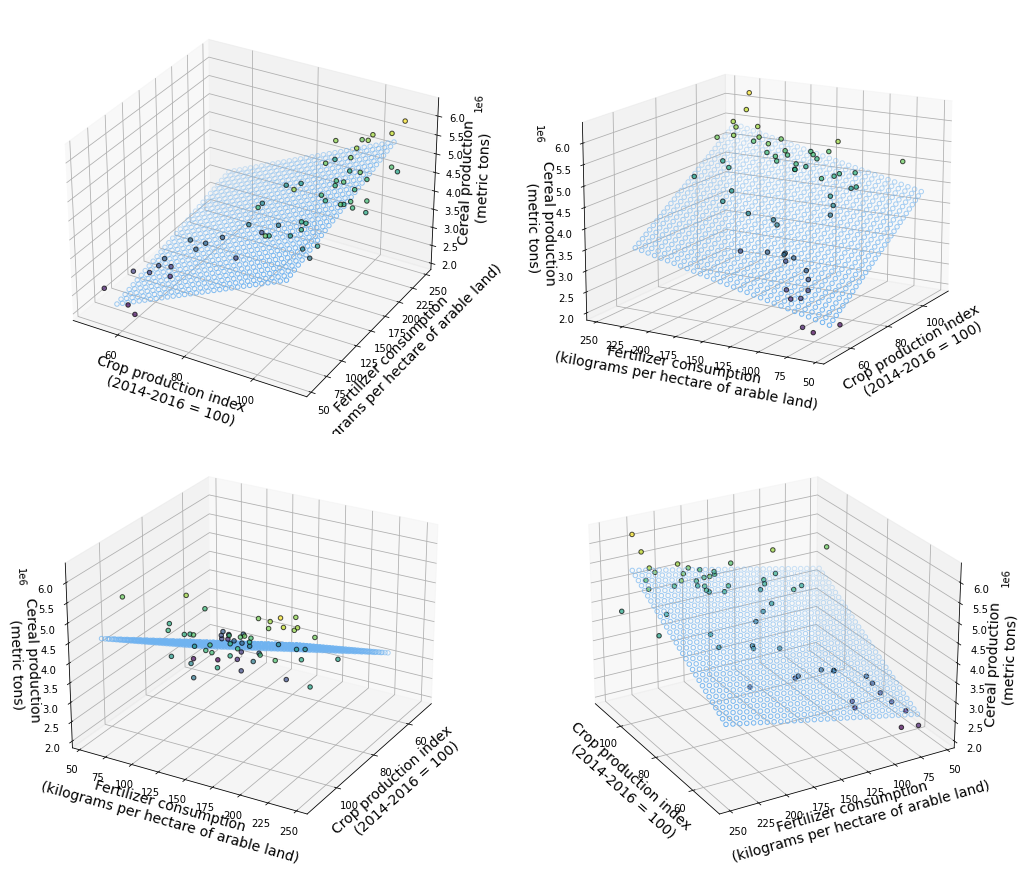

In [23]:
xx_pred = np.linspace(np.min(X_test[variable_x1]), np.max(X_test[variable_x1]), 30)
yy_pred = np.linspace(np.min(X_test[variable_x2]), np.max(X_test[variable_x2]), 30)
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
predicted = model.predict(model_viz)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, subplot_kw=dict(projection='3d'), figsize=(16,12))
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    #ax.plot(data[variable_x1], data[variable_x2], data[variable_y], color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(data[variable_x1], data[variable_x2], data[variable_y],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 20,
           c=data[variable_y])
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Crop production index \n (2014-2016 = 100)', fontsize=14)
    ax.set_ylabel('Fertilizer consumption \n (kilograms per hectare of arable land)', fontsize=14)
    ax.set_zlabel('Cereal production \n (metric tons)', fontsize=14)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#ax1.view_init(elev=25, azim=15)
ax2.view_init(elev=15, azim=-150)
ax3.view_init(elev=25, azim=30)
ax4.view_init(elev=25, azim=-210)

fig.tight_layout()
#plt.savefig('../plots/.png')